In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import seaborn as sns

In [2]:
# Reading in the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Creating a copy of the training set for data exploration
df_exp = train

### Checks:
1. What is the shape of the data-set? Display a few rows of the dataset
2. Display the dataset information?
2. What is the target variable?
3. List and assess which variables have null values that need to be taken care off.
4. Look at all the variables individually
 - Check if the variable is discrete or continuous?
 - Check if variable is nominal or ordinal
 - If discrete check for unique values
 - If continuous, take a look at the descriptive stats
 - If continuous, take a look at the distribution of the variable.
 - Get a sense of correlation between the attribute and target variable.

In [6]:
# DATASET SHAPE
df_exp.shape

(891, 12)

In [7]:
df_exp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# DATASET INFO DISPLAY
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# TARGET VARIABLE 
target = df_exp['Survived']

In [10]:
# lIST OF VARIABLE WITH NULL VALUES
nulls = ["Age", "Cabin", "Embarked"]

### ASSESSMENT OF INDIVIDUAL ATTRIBUTE

#### PassangerID

In [11]:
# This attribute does not seem to hold any predictive value towards the target. These are just IDs of the passengers. 

#### Pclass

In [12]:
df_exp['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [36]:
# Variable is categorical discrete and seems to be ordinal with Pclass=1 being better than Pclass=2 and then Pclass=3

In [28]:
df_exp['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

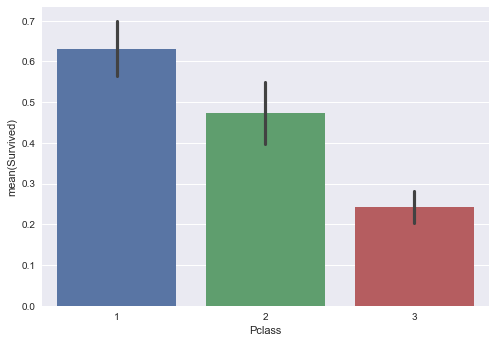

In [29]:
sns.barplot(x='Pclass', y='Survived', data=df_exp)
plt.show()

In [35]:
# Correlation between Pclass and target variable
df_exp['Pclass'].corr(df_exp['Survived'])

-0.3384810359610148

#### Name

In [48]:
# Like PassengerID, the name seems to be unique. There is good chance that a feature can be constructed
# using the designations (Eg - Mr., Mrs, Miss, etc)
# We will explore this later.

#### Sex

In [49]:
df_exp['Sex'].unique()

array(['male', 'female'], dtype=object)

In [50]:
# This variable is categorical.

In [51]:
df_exp['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

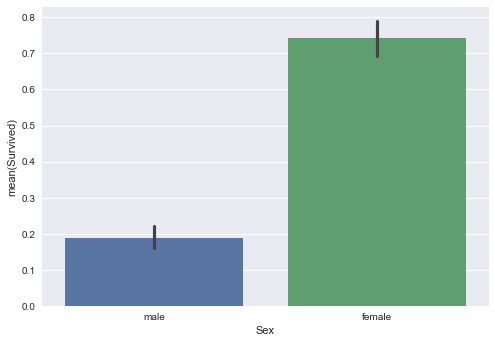

In [52]:
sns.barplot(x='Sex', y='Survived', data=df_exp)
plt.show()

In [54]:
# The above shows that the proportion of females that survived were much more than the males.
# So the chances of survival if you are a female would go up compared to if you are a male. 

#### Age

In [55]:
df_exp['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
df_exp['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [57]:
# This variable is continous. 

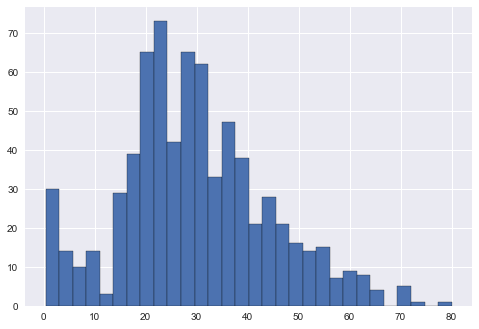

In [68]:
df_exp['Age'].hist(bins=30, edgecolor='black')
# sns.distplot(df_exp[df_exp['Age'].notnull()]['Age'])
plt.show()